# Hubble constant

Find cosmological parameters with SuperNova Data

In [102]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import random
import scipy
import scipy.special
import math
from scipy.optimize import minimize
import scipy.stats as stats
import time
%matplotlib inline

In [103]:
tb1=np.loadtxt('jla_mub_covmatrix.dat')
tb2=np.loadtxt('jla_mub.txt')

# divido los datos de jla_mub.txt en dos arrelgos z y mu 
z=tb2[:,0]
mu=tb2[:,1]

In [381]:
#arreglo los datos de jla_mud_covmatrix.dat en una matriz de 31x31
covmatrix=[]
for i in range(31):
    row=[]
    for j in range(31):
        row.append(tb1[i+j])
    covmatrix.append(row)
transcov=[]
for j in range(31):
    row2=[]
    for i in range(31):
        row2.append(covmatrix[j][i])
    transcov.append(row2)

In [382]:
#Pongo las varianzas de la matriz anterior (que se encuentran en la diagunal) en un arreglo.  
var=[]
i=0
for i in range(31):
    var.append(transcov[i][i])
print(var)

[0.021282623508, 0.00191890603135, 0.000946002078734, 0.000785929788351, 0.00058118111975, 0.000881982377062, 0.000475814667978, 0.0002771949789, 0.000412442631044, 0.000337802772456, 0.000219568852275, 0.000156728657954, 0.00013312123776, -2.56652148772e-05, -1.69501134141e-07, 0.000168120182278, 0.0281555226458, 0.00170209576027, 0.000322071612628, 0.00027386901185, 0.000487527914379, 0.000303494502829, 0.000468707727649, 0.000398765102369, 0.000403793237149, 0.000468308369318, 0.00044438179258, 0.000399516285585, 0.00016766393371, 1.53824589894e-05, 7.63422310477e-05]


In [106]:
def sss(omg):
    return pow((1-omg)/omg,(1/3))

In [107]:
def eta(a,omg):
    r=pow(pow(sss(omg),3)+1,0.5)
    return 2*r*pow((pow(a,-4)-(0.1540*sss(omg)*pow(a,-3))+(0.4304*pow(sss(omg),2)*pow(a,-2))+(0.19097*pow(sss(omg),3)*pow(a,-1))+(0.06694*pow(sss(omg),4))),-1/8)

In [108]:
#Solución aproximada
def D_L(z,omg,H):
    return (300000/H)*(1+z)*(eta(1,omg)-eta((1/(1+z)),omg))

In [109]:
def mud(z,omg,H):
    return 25-(5*math.log10(H/100))+(5*math.log10(D_L(z,omg,H)))

In [368]:
def lnlik (z,mu,var):
    
    fp=open('Tabla_datos.dat',"w")
    #fp.write("#Ho\tOmega\n")
    
    lk0=0
        
    #Datos iniciales
    omg0=0.2
    H0=60.0
    sigma1=0.05
    sigma2=2
    
    for k in range(len(z)):
        lk0=lk0+(pow((mu[k]-mud(z[k],omg0,H0)),2)/pow(var[k],2))
    lk0=-lk0/2.0    
    #Datos nuevos
    for i in range(1000):
        omg=np.random.normal(omg0,sigma1)
        H=np.random.normal(H0,sigma2)    
        lki=0        
        if omg>0 and H>0:
            fp.write("%f  \t%f \n" % (H0,omg0))
            for j in range(len(z)):
                lki=lki+(pow((mu[j]-mud(z[j],omg,H)),2)/pow(var[j],2))
            
            lki=-lki/2.0   
        
            print(lki,' ',lk0,' ',omg0,' ',omg,' ',H0,' ',H)
            if lki>lk0:
                omg0=omg
                H0=H
                lki=lk0
            
            else:
                pro=random.randrange(0,1000)/1000
                diff=lki-lk0
                if diff>math.log1p(pro):
                    omg0=omg
                    H0=H
    fp.close()

In [369]:
lnlik(z,mu,var)

-45665555811203.734   -36535000420160.54   0.2   0.2360150255575006   60.0   57.680409323343675
-33288878345510.523   -36535000420160.54   0.2   0.24397101737662752   60.0   60.90818809000663
-38424095011199.734   -36535000420160.54   0.24397101737662752   0.1962125835753314   60.90818809000663   59.4898386213347
-33545070680909.336   -36535000420160.54   0.24397101737662752   0.2521375292749014   60.90818809000663   60.82766265097816
-36706157158675.5   -36535000420160.54   0.2521375292749014   0.26917568446444795   60.82766265097816   59.92242488834767
-19490046825310.24   -36535000420160.54   0.2521375292749014   0.3604776727629105   60.82766265097816   65.44482521501594
-10514303609439.469   -36535000420160.54   0.3604776727629105   0.3043182937185113   65.44482521501594   69.94241033430168
-10374656806105.35   -36535000420160.54   0.3043182937185113   0.26817726758417815   69.94241033430168   70.08277955539182
-14363899520357.645   -36535000420160.54   0.26817726758417815   0.2252

-909934234478.6254   -36535000420160.54   0.12110061197097577   0.12635744220553854   83.75487671384097   88.13540343534846
-1336533957112.2004   -36535000420160.54   0.12635744220553854   0.07686860722272329   88.13540343534846   88.89007514517897
-1739262154207.4592   -36535000420160.54   0.07686860722272329   0.09640531328619562   88.89007514517897   89.79330301414736
-4327921740300.0522   -36535000420160.54   0.09640531328619562   0.13632976627312748   89.79330301414736   93.82623757844405
-3225467410912.7417   -36535000420160.54   0.13632976627312748   0.20305081670213826   93.82623757844405   92.48747245031737
-2264820811585.644   -36535000420160.54   0.20305081670213826   0.2499195014396368   92.48747245031737   90.99317285847114
-2458120445471.3633   -36535000420160.54   0.2499195014396368   0.24971761200582626   90.99317285847114   91.30987692164467
-1075717425722.9944   -36535000420160.54   0.24971761200582626   0.2524085316917841   91.30987692164467   88.67121254552843
-5482

-25798012374680.867   -36535000420160.54   0.12326248854451086   0.09448370477342787   111.08472345825089   110.49163018750262
-23202569676697.508   -36535000420160.54   0.09448370477342787   0.013268294065800032   110.49163018750262   109.46278229286487
-25404581419302.62   -36535000420160.54   0.013268294065800032   0.06971226384039944   109.46278229286487   110.09896994022448
-22518871731627.902   -36535000420160.54   0.06971226384039944   0.008143140448748011   110.09896994022448   109.60857222920917
-22542615593441.797   -36535000420160.54   0.008143140448748011   0.012120079301927836   109.60857222920917   109.14875168380262
-19124125343236.38   -36535000420160.54   0.012120079301927836   0.10272191745360257   109.14875168380262   106.31756864101192
-20497701656118.812   -36535000420160.54   0.10272191745360257   0.21411634938266372   106.31756864101192   107.53805322935209
-21367853158408.746   -36535000420160.54   0.21411634938266372   0.19799586659881357   107.53805322935209  

-16573462677592.102   -36535000420160.54   0.7130933507587702   0.6945320382046992   103.6229218916021   103.01152174919254
-16727386318824.178   -36535000420160.54   0.6945320382046992   0.6806832013075305   103.01152174919254   103.17985179178251
-17456925635465.646   -36535000420160.54   0.6806832013075305   0.7013995508254138   103.17985179178251   103.59221506735922
-13002661842508.191   -36535000420160.54   0.7013995508254138   0.7715715437238176   103.59221506735922   100.09398131619756
-12071314511012.709   -36535000420160.54   0.7715715437238176   0.8524480193969143   100.09398131619756   99.11295199474677
-15524655269109.902   -36535000420160.54   0.8524480193969143   0.9488804368572618   99.11295199474677   101.5413172892119
-16699320773536.78   -36535000420160.54   0.9488804368572618   0.9783434499839989   101.5413172892119   102.38944978963515
-16234731146261.988   -36535000420160.54   0.9783434499839989   0.9584224358080139   102.38944978963515   102.04420406867955
-15910

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


-24316032785504.805   -36535000420160.54   0.9337145424541033   0.9543041895607655   107.7169171349245   107.25055368051983
-19776720399341.57   -36535000420160.54   0.9543041895607655   0.9522632760934874   107.25055368051983   104.42291028217349


Text(0,0.5,'$\\Omega_m$')

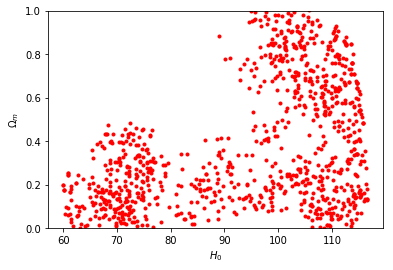

In [370]:
tbla1=np.loadtxt('Tabla_datos.dat')
H1=tbla1[:,0]
omh1=tbla1[:,1]
plt.plot(H1[:1000],omh1[:1000],'r.')
plt.ylim(0,1)

plt.xlabel('$H_0$')
plt.ylabel('$\Omega_m$')

In [290]:
print(H1,omh1)

[60.       60.       60.       ... 42.56433  43.136063 42.535149] [0.2      0.2      0.2      ... 3.637778 3.65869  3.675239]
